<a href="https://colab.research.google.com/github/chawadesu/HandsOnDL/blob/main/MNIST_with_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


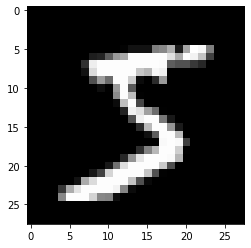

In [2]:
import matplotlib.pyplot as plt

plt.imshow(Xtrain[0],cmap='gray')
plt.show()

In [3]:
Xtrain.shape

(60000, 28, 28)

There are 60,000 pictures with resolution of 28*28.

Since Tensor requires 4D,


In [4]:
Xtrain[:,:,:,None].shape

(60000, 28, 28, 1)

Now we have 4D tensor ready to feed into neural network. 1 means gray (1 channel)

In [5]:
Ytrain.shape

(60000,)

Only list of pictures.


In [6]:
Xtrain = Xtrain.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)

MLP allows only 1D vector so need to reshape


In [7]:
Xtrain.shape

(60000, 784)

## One Hot Encoder

2>1 

---


Red>Green

In [8]:
Ytrain= tf.keras.utils.to_categorical(Ytrain, num_classes=10)
Ytest = tf.keras.utils.to_categorical(Ytest, num_classes=10)

X = 60000 * 784

---


Y = 60000 * 10

In [9]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), input_shape=(32, 32, 1), activation='relu'))
model.add(keras.layers.MaxPool2D()) 
model.add(keras.layers.Conv2D(16, (5,5), activation='relu')) 
model.add(keras.layers.MaxPool2D()) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [11]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:,None] / 255.
Xtest = Xtest[:,:,:,None] / 255.
Xtrain = tf.image.resize(Xtrain, (32,32))
Xtest = tf.image.resize(Xtest, (32,32))

In [12]:
Xtrain.shape

TensorShape([60000, 32, 32, 1])

In [13]:
model.fit(Xtrain, Ytrain, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 37s 4ms/step - loss: 0.4877
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1270
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0894
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0621
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0549
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0484
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0404
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364
Epoch 11/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341
Epoch 12/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0307


In [15]:
import numpy as np
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)

0.9884